# 資料預處理

In [1]:
import os
os.chdir("C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\Code")
import sys
sys.path.append("C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\Code")

from Get_file import Get_file   # return dirpath, dirnames, filenames
from FFT import FFT, PlotDataOnTimeDomain
from BandPassFilter import BandPassFilter, PlotDataOnFreqDomain, BandPassListFilter
import pyedflib
import numpy as np
import datetime

import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA

%matplotlib inline

data_path = "C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\database"  # EEG Data direction
BandPassICAFigureSavingDirection = "C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\Code\\Fig"
SaveFFTAllDataDirection = "C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\Code\\Fig\\FFTFig_AllData"

# Setting parameters
SampleFrequency = 128
DEBUG = True
LabelSize = 40
LowerFreqCut = 1
HigherFreqCut = 50
BandPassOrder = 9
channel_we_use = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]   # 0~39 共40, 14 channels we use
SAVE_FIG = False


### 讀取檔案

In [2]:
#Four Lables
normal_label = []   # 0
scare_label = []    # 1
touch_label = []    # 2
laugh_label = []    # 3

#Four Signal
normal_signal = []
scare_signal = []
touch_signal = []
laugh_signal = []

signal = []
labels = []

_,data_files,_ = Get_file(data_path)
if data_files == []:
    raise("Not found any files ! check your data_path")
else:
    print('Get data from database ...')
    for data in data_files:
        _,_,file_names = Get_file(data_path+'\\'+data)
        for fn in file_names:
            if fn.split('.')[1] == 'edf':
                StudentID = fn.split('.')[0][0:7]
                fedf = pyedflib.EdfReader(data_path+'\\'+data+'\\'+fn)
                n = fedf.signals_in_file
                signal_labels = np.asarray(fedf.getSignalLabels())
                sigbufs = np.zeros((n, fedf.getNSamples()[0]))
                for i in np.arange(n):
                    sigbufs[i, :] = fedf.readSignal(i)

                if 'normal' in fn:
                    normal_label.append(0)
                    normal_signal.append(sigbufs)
                    normal_signal.append(StudentID)
                elif 'scare' in fn:
                    scare_label.append(1)
                    scare_signal.append(sigbufs)
                    scare_signal.append(StudentID)
                elif 'touch' in fn:
                    touch_label.append(2)
                    touch_signal.append(sigbufs)
                    touch_signal.append(StudentID)
                elif 'laugh' in fn:
                    laugh_label.append(3)
                    laugh_signal.append(sigbufs)
                    laugh_signal.append(StudentID)
                    
                if DEBUG:
                    print(sigbufs.shape)

''' Labels --> 40 channels
['COUNTER' 'INTERPOLATED' 'AF3' 'F7' 'F3' 'FC5' 'T7' 'P7' 'O1' 'O2' 'P8'
 'T8' 'FC6' 'F4' 'F8' 'AF4' 'RAW_CQ' 'GYROX' 'GYROY' 'MARKER'
 'MARKER_HARDWARE' 'SYNC' 'TIME_STAMP_s' 'TIME_STAMP_ms' 'CQ_AF3' 'CQ_F7'
 'CQ_F3' 'CQ_FC5' 'CQ_T7' 'CQ_P7' 'CQ_O1' 'CQ_O2' 'CQ_P8' 'CQ_T8' 'CQ_FC6'
 'CQ_F4' 'CQ_F8' 'CQ_AF4' 'CQ_CMS' 'CQ_DRL']
'''
ChannelDict = {
    0 : 'COUNTER', 1 : 'INTERPOLATED', 2 : 'AF3', 3 : 'F7',
    4 : 'F3', 5 : 'FC5', 6 : 'T7', 7 : 'P7',
    8 : 'O1', 9 : 'O2', 10 : 'P8', 11 : 'T8',
    12 : 'FC6', 13 : 'F4', 14 : 'F8', 15 : 'AF4',
    16 : 'RAW_CQ', 17 : 'GYROX', 18 : 'GYROY', 19 : 'MARKER',
    20 : 'MARKER_HARDWARE', 21 : 'SYNC', 22 : 'TIME_STAMP_s', 23 : 'TIME_STAMP_ms',
    24 : 'CQ_AF3', 25 : 'CQ_F7', 26 : 'CQ_F3', 27 : 'CQ_FC5',
    28 : 'CQ_T7', 29 : 'CQ_P7', 30 : 'CQ_O1', 31 : 'CQ_O2',
    32 : 'CQ_P8', 33 : 'CQ_T8', 34 : 'CQ_FC6', 35 : 'CQ_F4',
    36 : 'CQ_F8', 37 : 'CQ_AF4', 38 : 'CQ_CMS', 39 : 'CQ_DRL',
}

print('Okay')
if DEBUG:
    print('normal signal length : ', len(normal_signal))
    print('scare signal length : ', len(scare_signal))
    print('touch signal length : ', len(touch_signal))
    print('laugh signal length : ', len(laugh_signal))


Get data from database ...
(40, 38400)
(40, 105344)
(40, 38400)
(40, 105344)
(40, 179328)
(40, 309760)
(40, 38400)
(40, 105728)
(40, 158976)
(40, 58112)
(40, 50944)
(40, 33152)
(40, 3968)
(40, 38400)
(40, 105344)
(40, 178944)
(40, 308992)
(40, 38400)
(40, 105728)
(40, 179840)
(40, 38400)
(40, 178944)
(40, 308864)
(40, 38400)
(40, 105344)
(40, 179072)
(40, 83328)
(40, 117632)
(40, 107392)
(40, 38400)
(40, 308992)
(40, 38400)
(40, 179072)
(40, 105344)
(40, 308736)
(40, 38400)
(40, 313472)
(40, 38400)
(40, 105344)
(40, 38400)
(40, 105344)
(40, 38528)
(40, 179200)
(40, 308736)
(40, 38400)
(40, 179328)
(40, 38400)
(40, 105344)
Okay
normal signal length :  30
scare signal length :  20
touch signal length :  16
laugh signal length :  30


In [3]:
def CheckListTheSameSize(ListData):
    di = 0
    dsum = 0
    for i in range(len(ListData)):
        if i == 0:
            pass
        else:
            dsum += (ListData[i].shape == ListData[i-1].shape)
            
    if np.sum(dsum) != (len(ListData)-1):
        return False
    else:
        return True
    
def CalculateZeros(NumpyArray):
    LogicWithZeros = (NumpyArray == 0)
    return np.sum(LogicWithZeros)

def PlotFreqencyFigure(FreqList, FFTData, FreqL, FreqH, YlimL=None, YlimH=None, title=None, FigSize=(12,8)):
    plt.figure(figsize=FigSize)
    plt.plot(FreqList, FFTData, '*-')
    plt.xlabel('Freq(Hz)')
    plt.ylabel('micro volt (mv)')
    plt.xlim(FreqL, FreqH)
    if YlimL is None and YlimH is None:
        pass
    else:
        plt.ylim(YlimL, YlimH)
    if title is not None:
        plt.title(title)
        
    else:
        plt.title('FreqencyFigure')
    plt.grid(True)
    plt.show()

In [4]:
# TimeSecondsi : Occur seconds init
# TimeSecondsf : Occur seconds final
def GrabEmotion(SignalList, StudentID, TimeList, fs=128):
    channel_we_use = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]   # 0~39 共40, 14 channels we use
    Indexi = TimeList[0] * fs
    Indexf = TimeList[1] * fs
    
    DataNums = int(len(SignalList)/2)
    for i in range(DataNums):
        StdID = SignalList[2*i+1]
        if StdID ==  StudentID:
            LabelNum = SignalList[i*2].shape[0]
            ReturnAllChannelTimeSliceData = np.zeros([len(channel_we_use), (Indexf-Indexi)], dtype=np.float32)
            ChCNT = 0
            for ch in range(LabelNum):
                if ch in channel_we_use:
                    ReturnAllChannelTimeSliceData[ChCNT, :] = SignalList[i*2][ch][Indexi:Indexf]
                    ChCNT += 1
            if CalculateZeros(ReturnAllChannelTimeSliceData) == 0:
                print(StdID, ReturnAllChannelTimeSliceData.shape)
                return ReturnAllChannelTimeSliceData
            else:
                print("Warning: Have Zero Values in the Numpy array !!!")
    print('None')
    return None


In [5]:
def Cal(minu, sec):
    mid = minu*60 + sec
    return [mid-5, mid+5]

In [6]:
# Grab the Normal Data
PerDataNum = 10*SampleFrequency
GrabNormal = []
DataNums = int(len(normal_signal)/2)
for i in range(DataNums):
    Times = 0
    TimesToSplit = 30
    for x in range(TimesToSplit):
        ChannelBuffer = np.zeros([14, PerDataNum], dtype=np.float32)
        CHCNT = 0
        for ch in range(40):
            if ch in channel_we_use:
                ChannelBuffer[CHCNT,:] = normal_signal[2*i][ch][Times:(Times+PerDataNum)]
                CHCNT += 1
        if(CalculateZeros(ChannelBuffer) != 0):
            print('Warning !!! Have Zeros Values in array')
        GrabNormal.append(ChannelBuffer)
        Times+=PerDataNum


In [7]:
# Grab the Scare Data
GrabScare = []
GrabScare.append(GrabEmotion(scare_signal, '1032911',Cal(0,30), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032911',Cal(9,55), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032911',Cal(10,52), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032911',Cal(11,44), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032912',Cal(10,25), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032912',Cal(11,44), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032921',Cal(6,18), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032921',Cal(11,25), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032921',Cal(12,20), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032924',Cal(10,29), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032924',Cal(11,44), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032931',Cal(0,30), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032931',Cal(2,30), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032931',Cal(4,43), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032931',Cal(7,45), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032931',Cal(9,45), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032931',Cal(10,50), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032931',Cal(11,44), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(1,8), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(2,27), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(7,6), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(8,11), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(8,27), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(9,57), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(10,15), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(10,25), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(10,33), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(10,53), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(11,14), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(11,38), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(11,46), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(11,55), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032943',Cal(12,0), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032950',Cal(10,27), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032950',Cal(10,47), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032950',Cal(11,16), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032950',Cal(11,28), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032950',Cal(11,49), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032950',Cal(12,0), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032957',Cal(9,58), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032957',Cal(10,28), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032957',Cal(11,18), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032957',Cal(11,33), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1032957',Cal(11,54), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1033306',Cal(11,17), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1033306',Cal(11,33), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1033306',Cal(12,34), fs=128))
GrabScare.append(GrabEmotion(scare_signal, '1044432',Cal(12,0), fs=128))

1032911 (14, 1280)
1032911 (14, 1280)
1032911 (14, 1280)
1032911 (14, 1280)
1032912 (14, 1280)
1032912 (14, 1280)
1032921 (14, 1280)
1032921 (14, 1280)
1032921 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032957 (14, 1280)
1032957 (14, 1280)
1032957 (14, 1280)
1032957 (14, 1280)
1032957 (14, 1280)
1033306 (14, 1280)
1033306 (14, 1280)
1033306 (14, 1280)
1044432 (14, 1280)


In [8]:
# Grab the Touch Data
GrabTouch = []
GrabTouch.append(GrabEmotion(touch_signal, '1032912',Cal(3,41), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032912',Cal(21,29), fs=128))

GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(6,14), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(8,45), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(9,45), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(11,5), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(13,39), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(14,50), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(15,17), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(17,24), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(19,14), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(19,43), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(20,10), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032924',Cal(22,48), fs=128))

GrabTouch.append(GrabEmotion(touch_signal, '1032931',Cal(16,12), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032931',Cal(17,24), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032931',Cal(19,12), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032931',Cal(19,40), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032931',Cal(22,28), fs=128))

GrabTouch.append(GrabEmotion(touch_signal, '1032940',Cal(8,55), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032940',Cal(10,15), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032940',Cal(14,50), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032940',Cal(17,25), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032940',Cal(19,13), fs=128))

GrabTouch.append(GrabEmotion(touch_signal, '1032943',Cal(9,0), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032943',Cal(14,33), fs=128))

GrabTouch.append(GrabEmotion(touch_signal, '1032950',Cal(9,53), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032950',Cal(12,8), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032950',Cal(15,18), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032950',Cal(15,43), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032950',Cal(18,3), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1032950',Cal(21,28), fs=128))

GrabTouch.append(GrabEmotion(touch_signal, '1042933',Cal(10,0), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1042933',Cal(14,0), fs=128))

GrabTouch.append(GrabEmotion(touch_signal, '1044432',Cal(8,22), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1044432',Cal(10,42), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1044432',Cal(21,26), fs=128))
GrabTouch.append(GrabEmotion(touch_signal, '1044432',Cal(22,6), fs=128))

1032912 (14, 1280)
1032912 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032940 (14, 1280)
1032940 (14, 1280)
1032940 (14, 1280)
1032940 (14, 1280)
1032940 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1042933 (14, 1280)
1042933 (14, 1280)
1044432 (14, 1280)
1044432 (14, 1280)
1044432 (14, 1280)
1044432 (14, 1280)


In [9]:
# Grab the Laugh Data
GrabLaugh = []
GrabLaugh.append(GrabEmotion(laugh_signal, '1032921',Cal(5,2), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032921',Cal(9,15), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032921',Cal(15,40), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032921',Cal(26,40), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032921',Cal(32,46), fs=128))

GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(0,19), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(0,45), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(3,11), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(4,58), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(5,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(5,57), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(6,31), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(7,4), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(9,18), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(10,39), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(12,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(16,2), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(16,46), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032924',Cal(18,5), fs=128))

GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(9,16), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(14,43), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(15,32), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(16,15), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(17,45), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(18,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(18,15), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(21,14), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(28,55), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032931',Cal(35,56), fs=128))

GrabLaugh.append(GrabEmotion(laugh_signal, '1032943',Cal(4,10), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032943',Cal(9,30), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032943',Cal(13,53), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032943',Cal(17,45), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032943',Cal(28,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032943',Cal(30,6), fs=128))

GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(4,30), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(4,47), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(5,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(5,18), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(6,4), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(7,0), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(8,48), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(9,19), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(9,30), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(10,37), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(10,56), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(12,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(14,4), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(15,33), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(16,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(16,43), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(17,2), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(17,39), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(18,6), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(18,13), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(18,37), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(18,48), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(19,4), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(20,0), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(20,28), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(20,37), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(21,0), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(21,10), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(21,53), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(22,18), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(22,45), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(24,7), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(25,5), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(26,23), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(26,40), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(26,54), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(30,6), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(31,7), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(32,41), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(33,6), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(33,40), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(36,55), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032950',Cal(37,23), fs=128))

GrabLaugh.append(GrabEmotion(laugh_signal, '1032956',Cal(5,2), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032956',Cal(9,16), fs=128))

GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(5,15), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(8,32), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(10,40), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(12,2), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(15,32), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(16,51), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(17,15), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(20,28), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(21,52), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(22,17), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(26,40), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(28,55), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(33,3), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1032957',Cal(37,16), fs=128))

GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(9,30), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(10,43), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(14,0), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(15,35), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(18,6), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(30,8), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(33,40), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(38,0), fs=128))
GrabLaugh.append(GrabEmotion(laugh_signal, '1044432',Cal(39,36), fs=128))


1032921 (14, 1280)
1032921 (14, 1280)
1032921 (14, 1280)
1032921 (14, 1280)
1032921 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032924 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032931 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032943 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14, 1280)
1032950 (14,

In [10]:
if DEBUG:
    print(len(GrabNormal))
    print(len(GrabScare))
    print(len(GrabTouch))
    print(len(GrabLaugh))

450
48
38
103


### Analyze steps : Filters ==> ICA ==> FFT ==> Build Model

In [11]:
def GrabSignalArray(SignalList, channel, LowerFreqCut, HigherFreq, fs, order=5, PlotFlag=False):
    SignalArray = np.zeros([len(SignalList), 64], dtype=np.float32)
    for i in range(len(SignalList)):
        for ch in range(14):
            if ch==channel:
                BandPassedData = BandPassFilter(SignalList[i][ch,:], LowerFreqCut, HigherFreq, fs, order=9)
                FreqList, FFTData = FFT(BandPassedData, fs, 128)
                if PlotFlag:
                    PlotDataOnFreqDomain(FFTData, fs, LowerFreqCut, HigherFreqCut, title=str(i))
                SignalArray[i, :] = FFTData
    if CalculateZeros(SignalArray) == 0:
        return SignalArray
    else:
        print('Warning, Have zeros value in array !!!')
        return SignalArray

In [12]:
for i in range(14):
    TrainNormal = GrabSignalArray(GrabNormal[100:200], i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)
    TrainScare = GrabSignalArray(GrabScare, i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)
    TrainTouch = GrabSignalArray(GrabTouch, i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)
    TrainLaugh = GrabSignalArray(GrabLaugh, i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)
    
    
    TrainingDataSplitTimeDomainX = np.vstack((TrainNormal,
                                            TrainScare,
                                            TrainTouch,
                                            TrainLaugh))
    clf = Danny_ML_CLF()
    train_X, test_X, train_y, test_y = clf.Split_data(TrainingDataSplitTimeDomainX, TrainingDataSplitTimeDomainy, test_size=0.3, Standard=True)
    clf.Fit_value(train_X, train_y)
    clf.Train()
    clf.Report(train_X, train_y, [1,2,3,4], show_cm=False)
    clf.Report2txt('Train.txt')
    print(clf.Score())
    print()
    clf.Report(test_X, test_y, [1,2,3,4], show_cm=False)
    clf.Report2txt('Test.txt')
    print(clf.Score())
    print('Report Okay !\n\n')


NameError: name 'Danny_ML_CLF' is not defined

In [19]:
for i in range(14):
    TrainNormal = GrabSignalArray(GrabNormal[100:200], i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)[:,6:31]
    TrainScare = GrabSignalArray(GrabScare, i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)[:,6:31]
    TrainTouch = GrabSignalArray(GrabTouch, i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)[:,6:31]
    TrainLaugh = GrabSignalArray(GrabLaugh, i, LowerFreqCut, HigherFreqCut, SampleFrequency, order=9, PlotFlag=False)[:,6:31]
    Y_Normal = np.ones(TrainNormal.shape[0]) * 1
    Y_Scare = np.ones(TrainScare.shape[0]) * 2
    Y_Touch = np.ones(TrainTouch.shape[0]) * 3
    Y_Laugh = np.ones(TrainLaugh.shape[0]) * 4
    
    if i > 0:
        TrainingDataSplitTimeDomainX = np.vstack((TrainingDataSplitTimeDomainX,
                                                  TrainNormal,
                                                TrainScare,
                                                TrainTouch,
                                                TrainLaugh))
        TrainingDataSplitTimeDomainy = np.hstack((TrainingDataSplitTimeDomainy,
                                                  Y_Normal,
                                                 Y_Scare,
                                                 Y_Touch,
                                                 Y_Laugh))
    else:
        TrainingDataSplitTimeDomainX = np.vstack((TrainNormal,
                                                TrainScare,
                                                TrainTouch,
                                                TrainLaugh))
        TrainingDataSplitTimeDomainy = np.hstack((Y_Normal,
                                                 Y_Scare,
                                                 Y_Touch,
                                                 Y_Laugh))

    




In [20]:
TrainingDataSplitTimeDomainX.shape

(4046, 25)

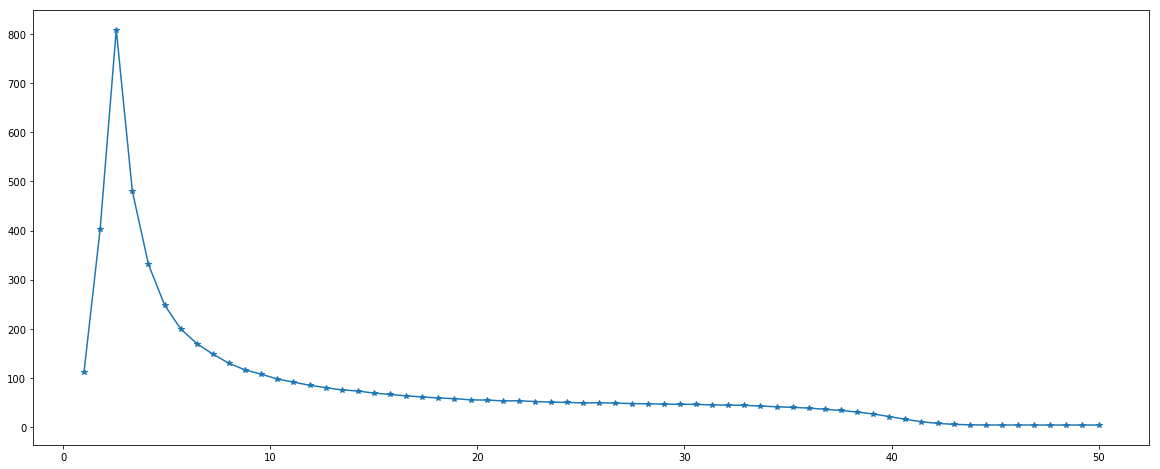

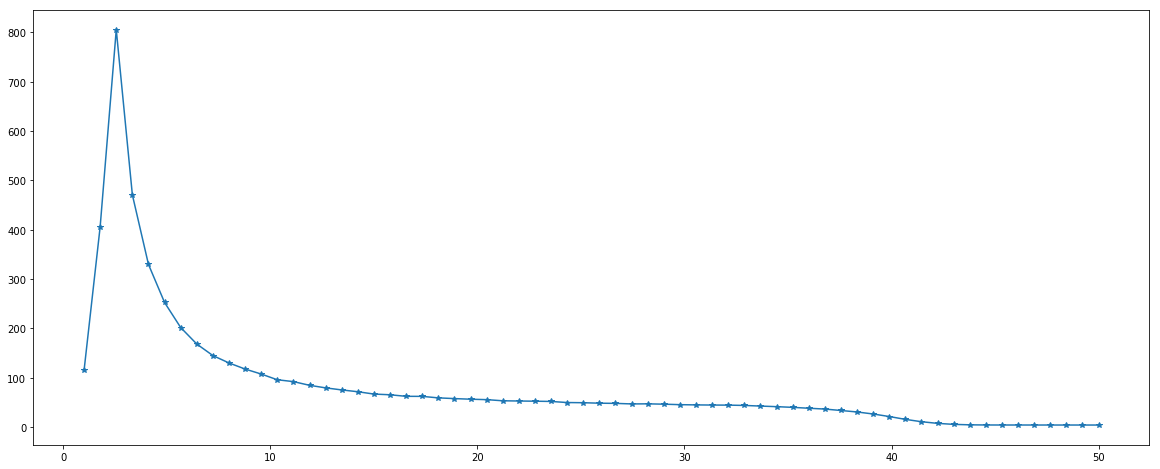

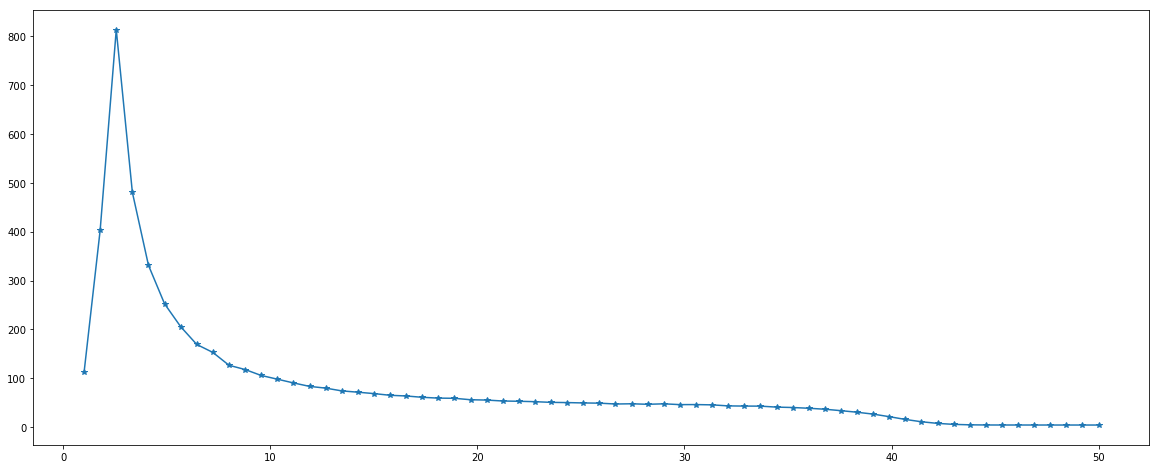

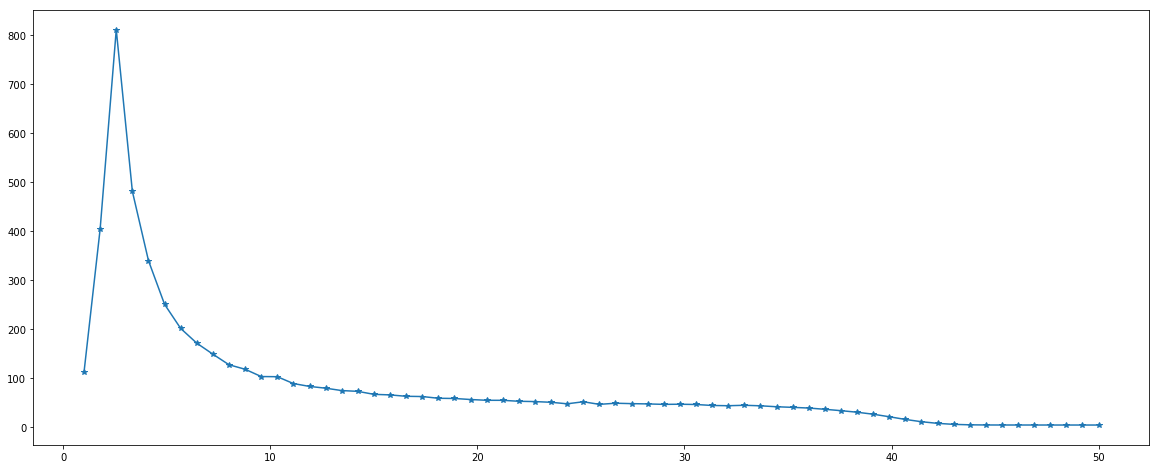

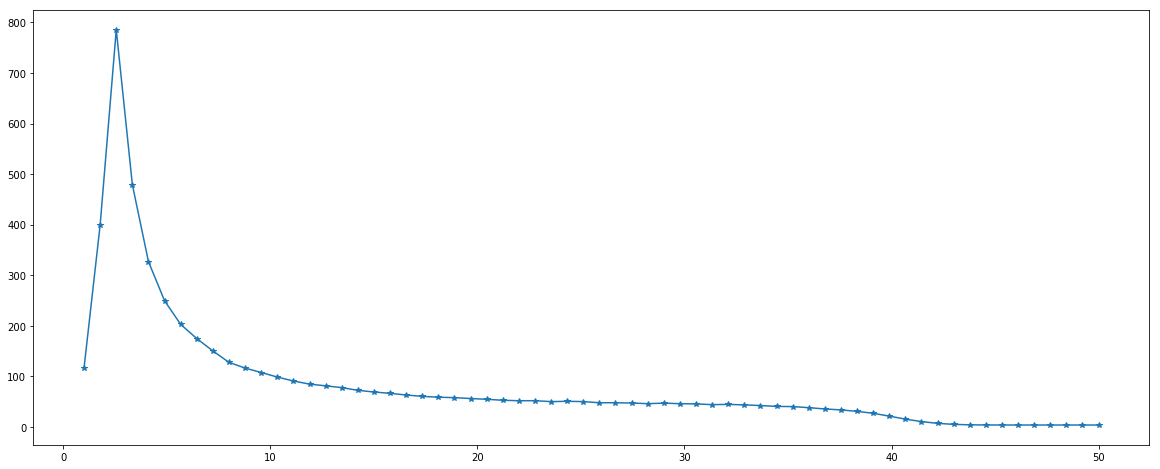

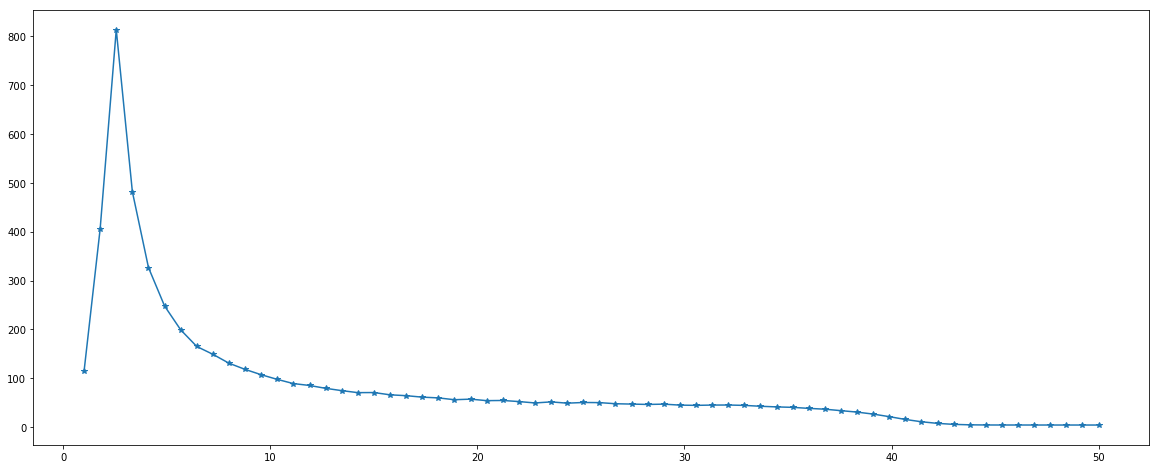

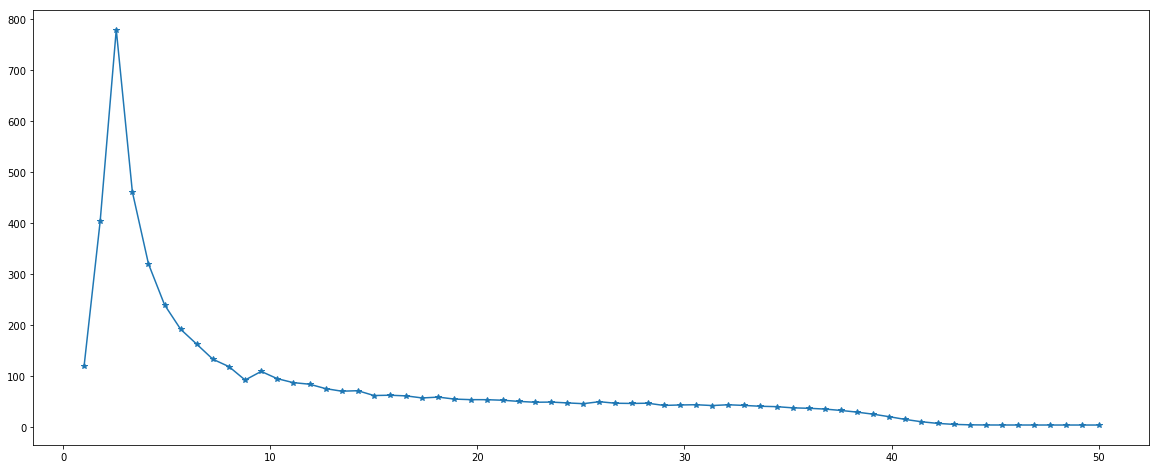

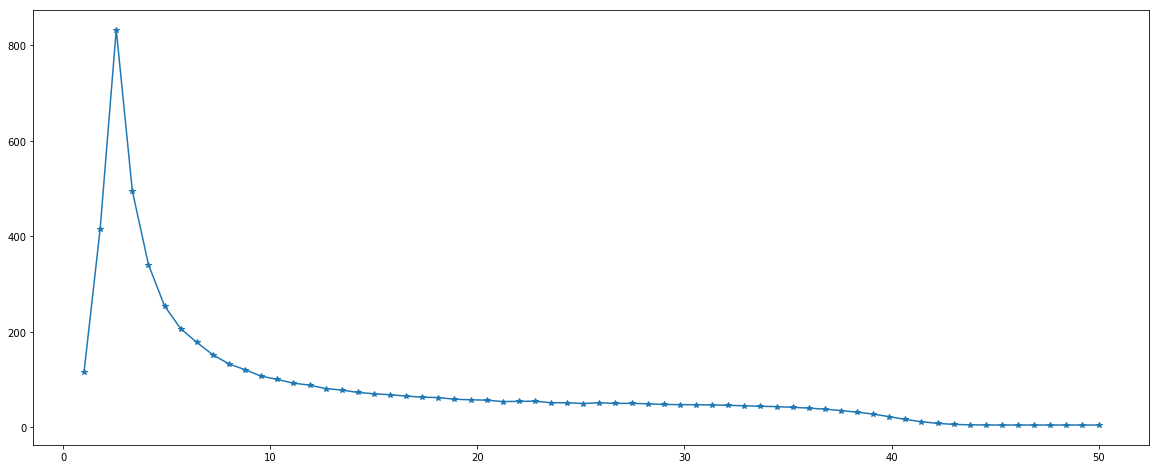

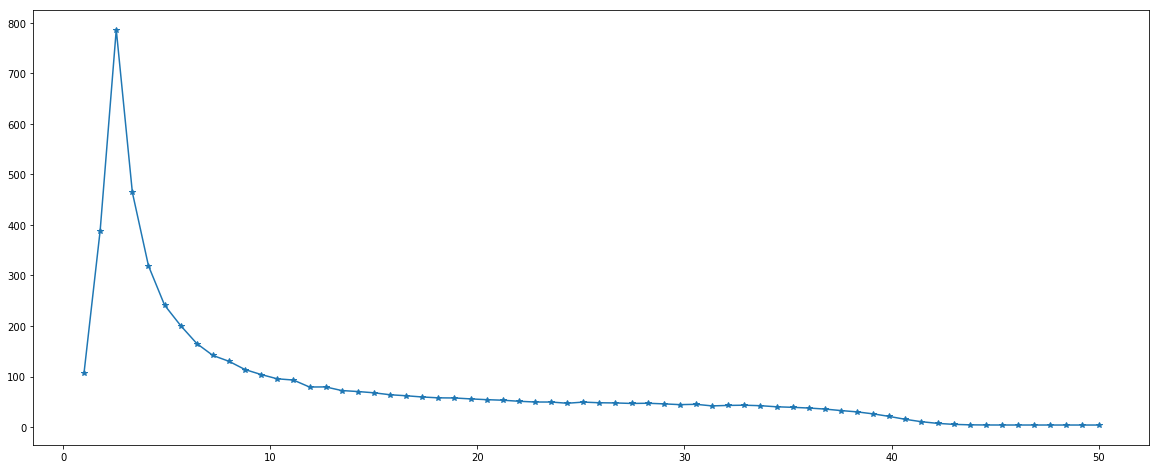

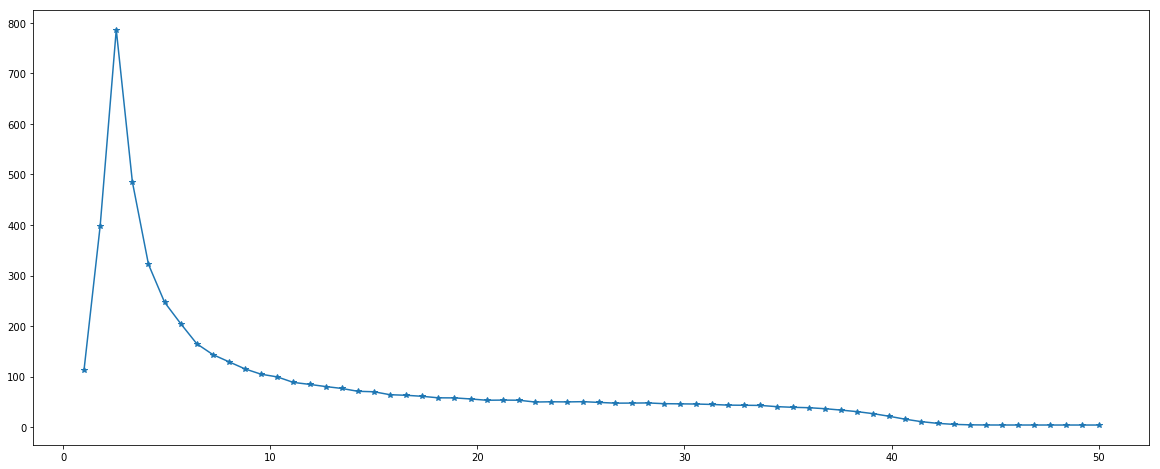

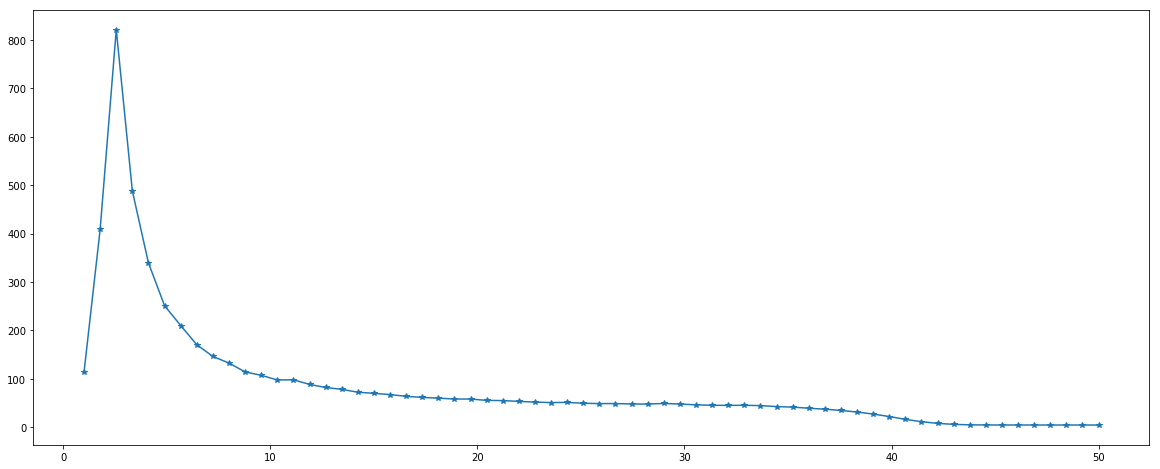

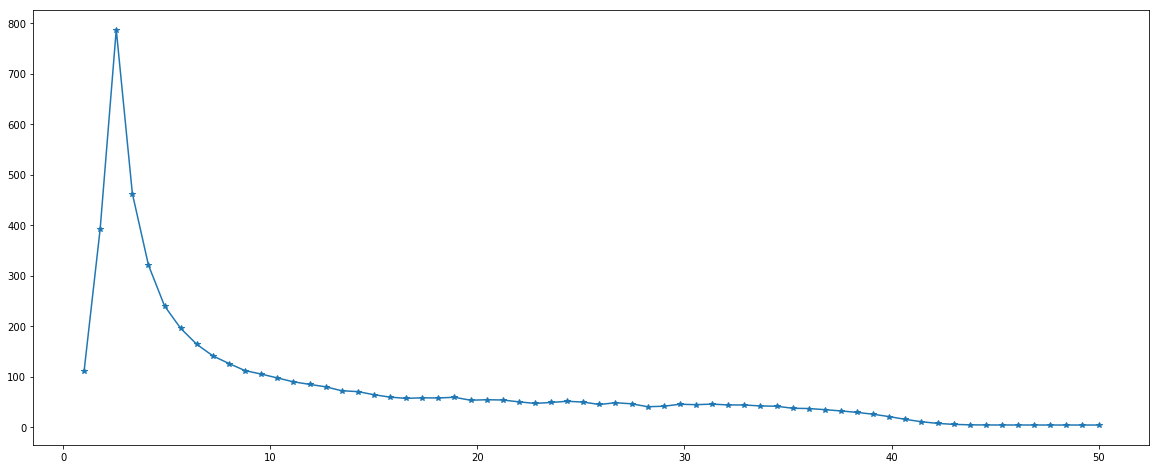

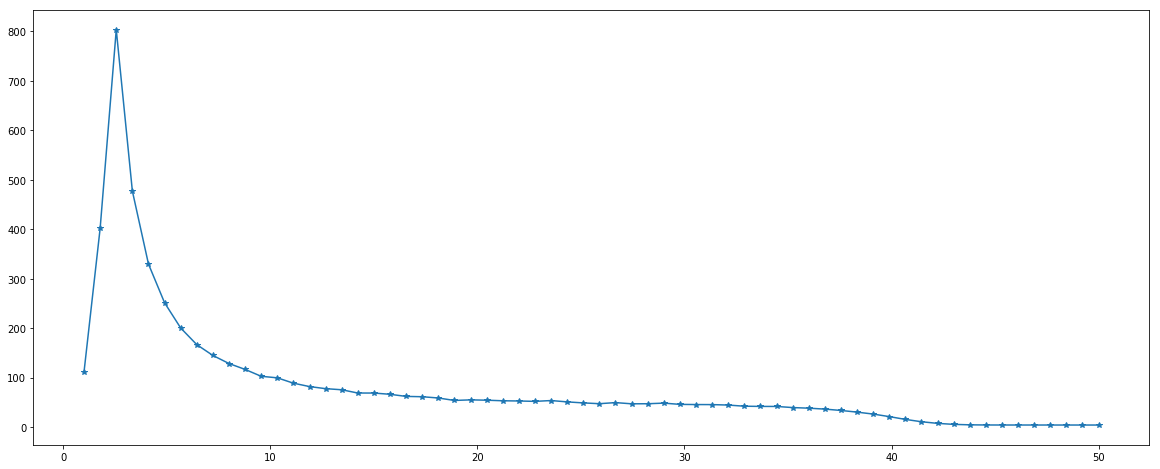

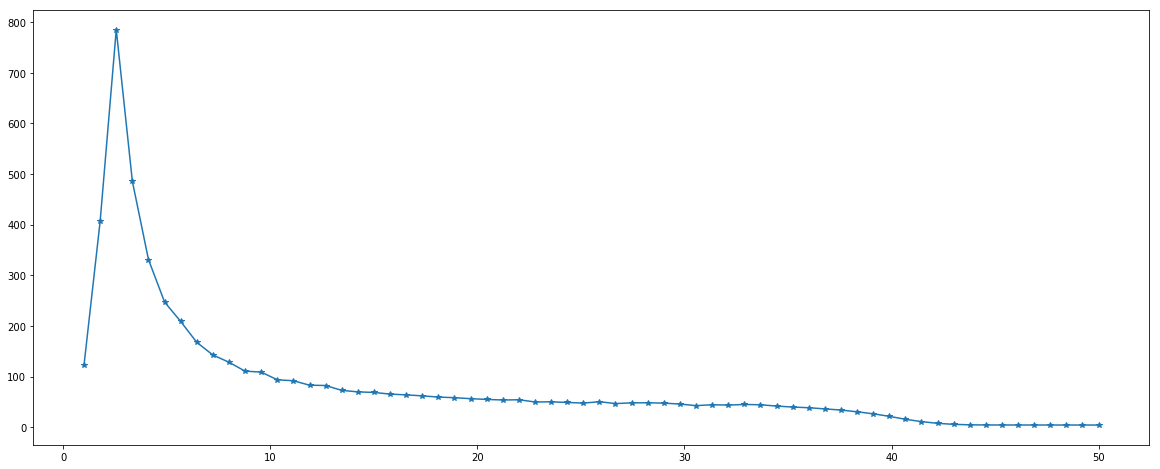

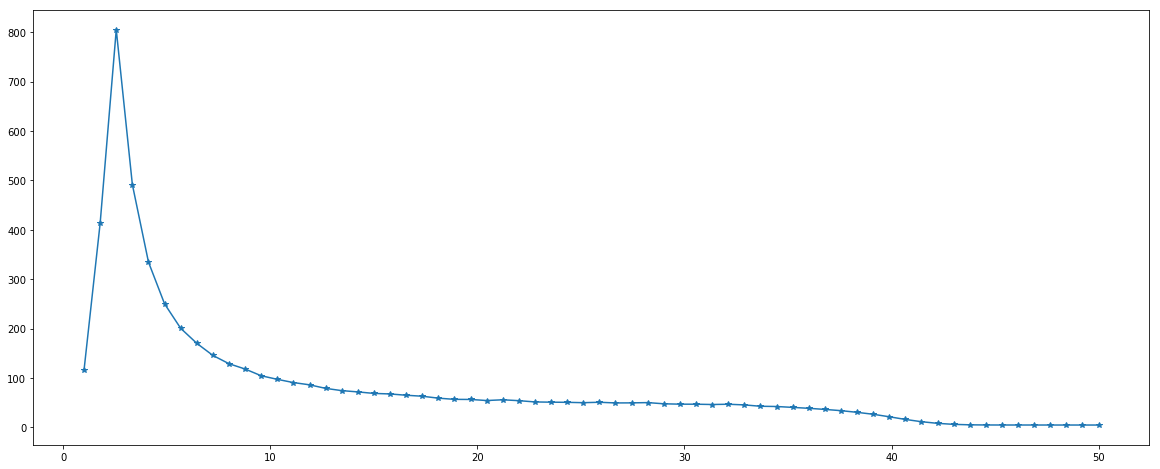

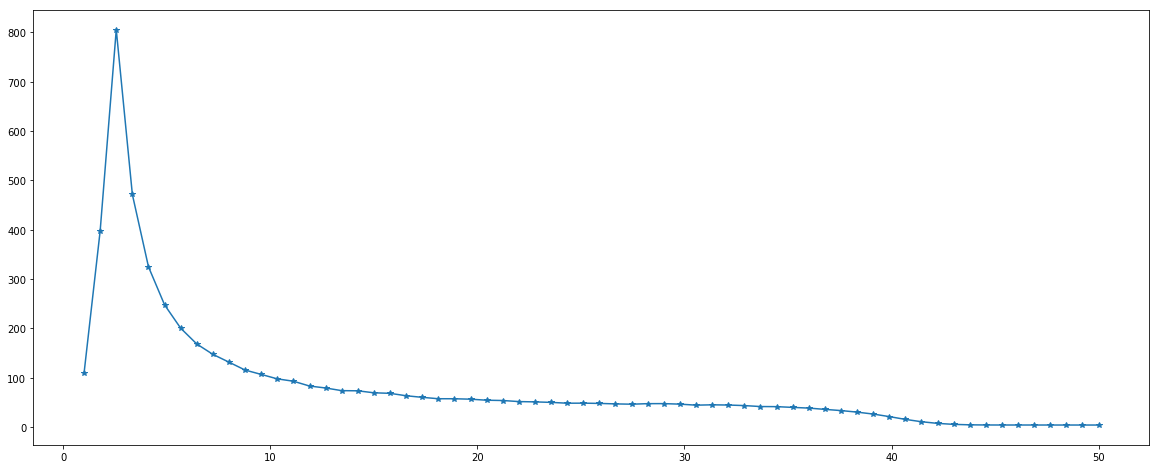

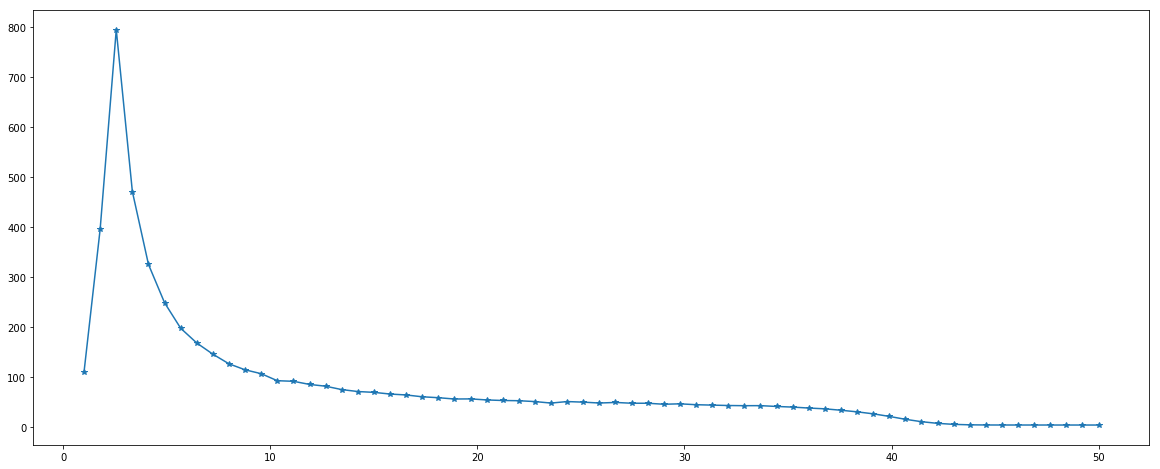

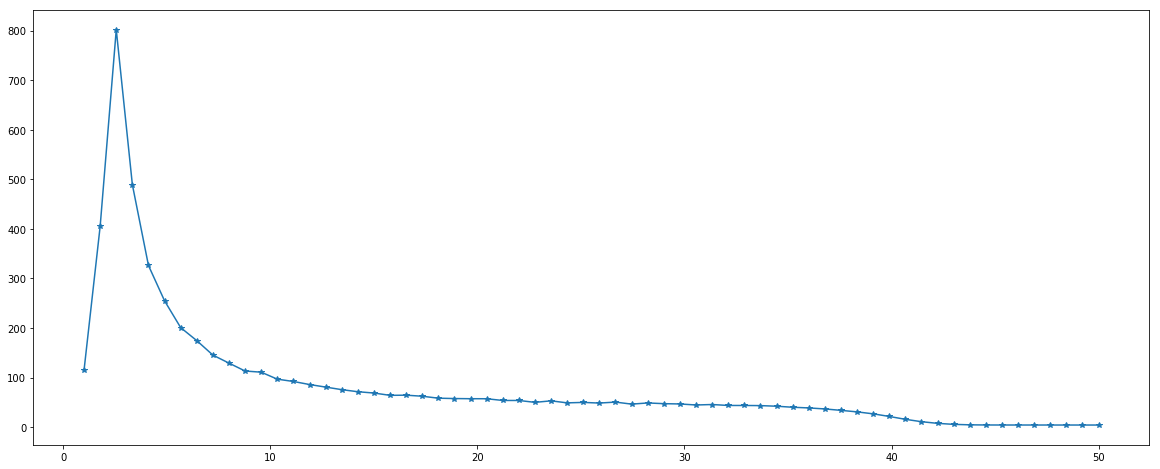

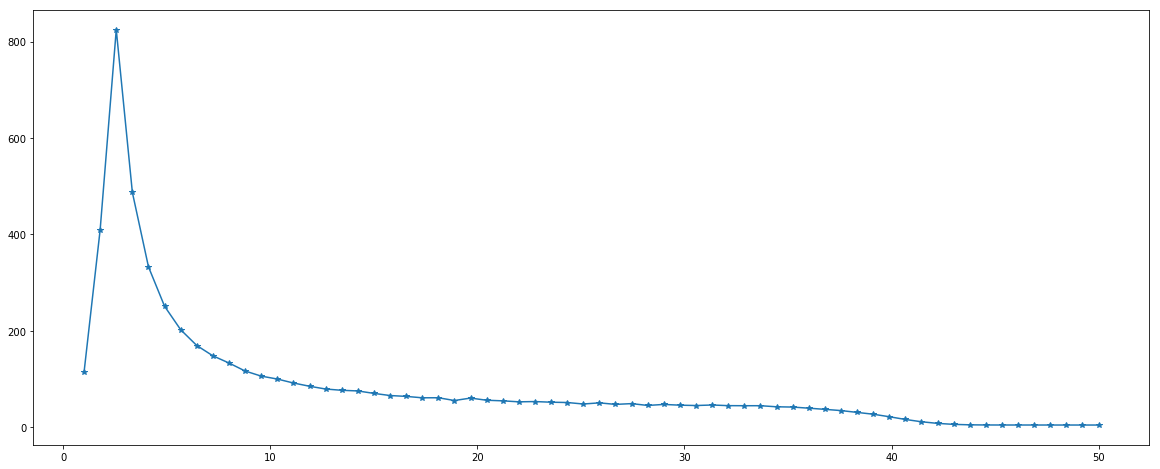

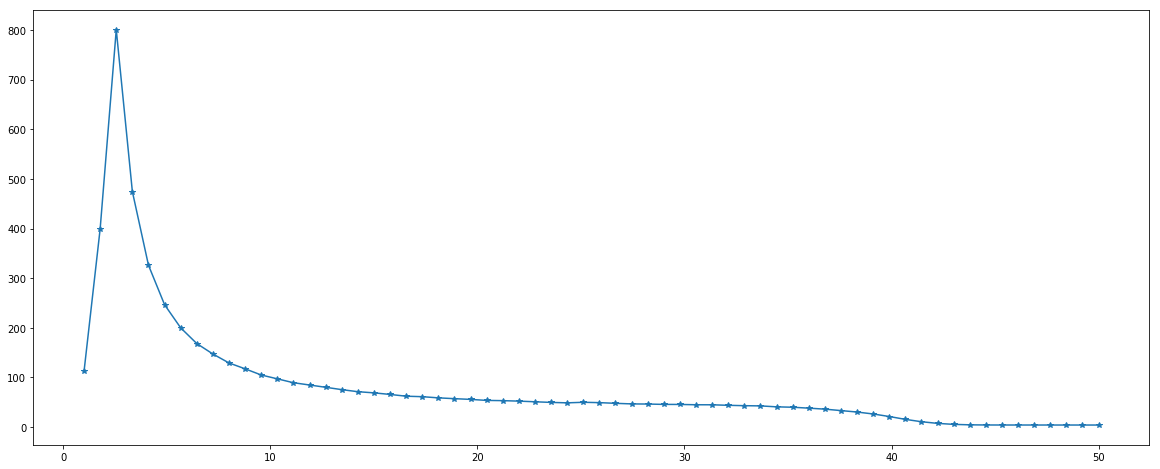

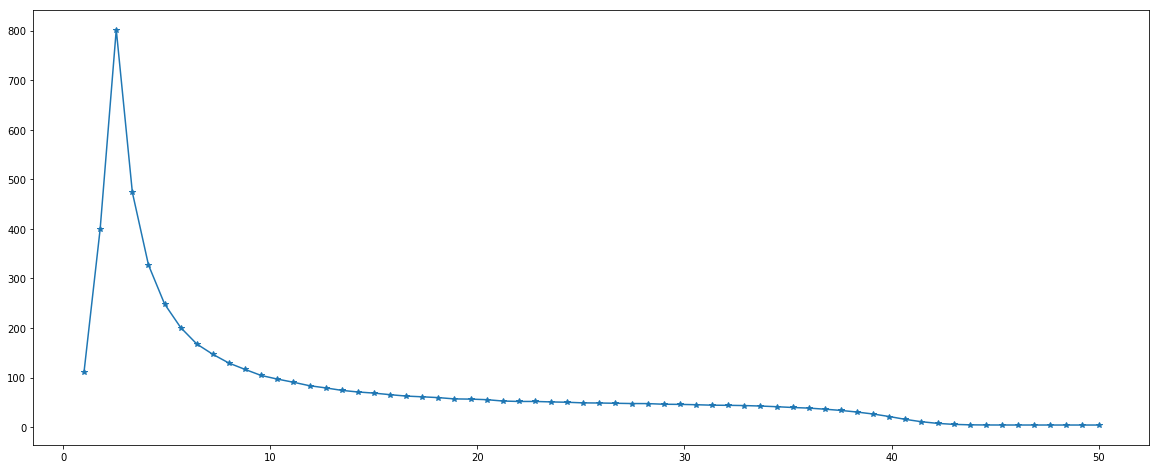

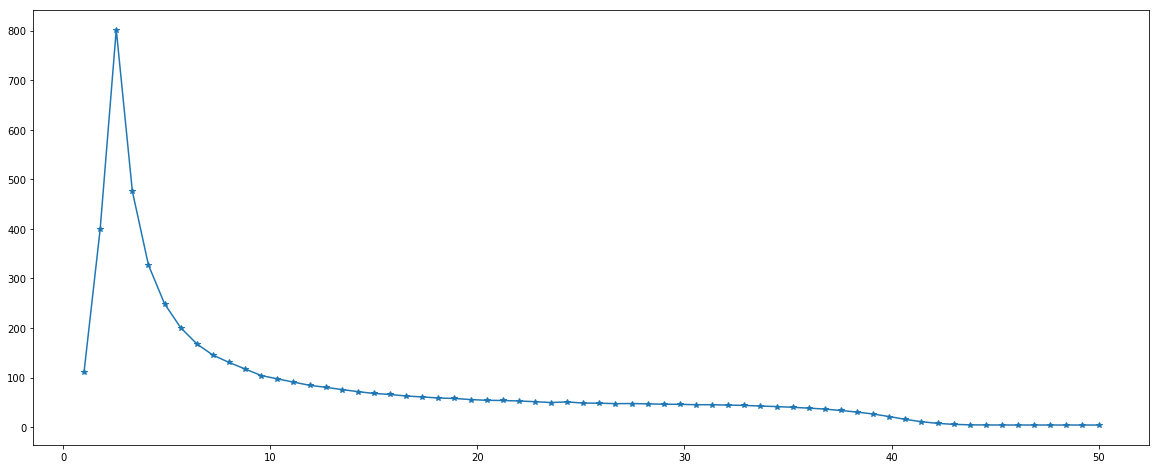

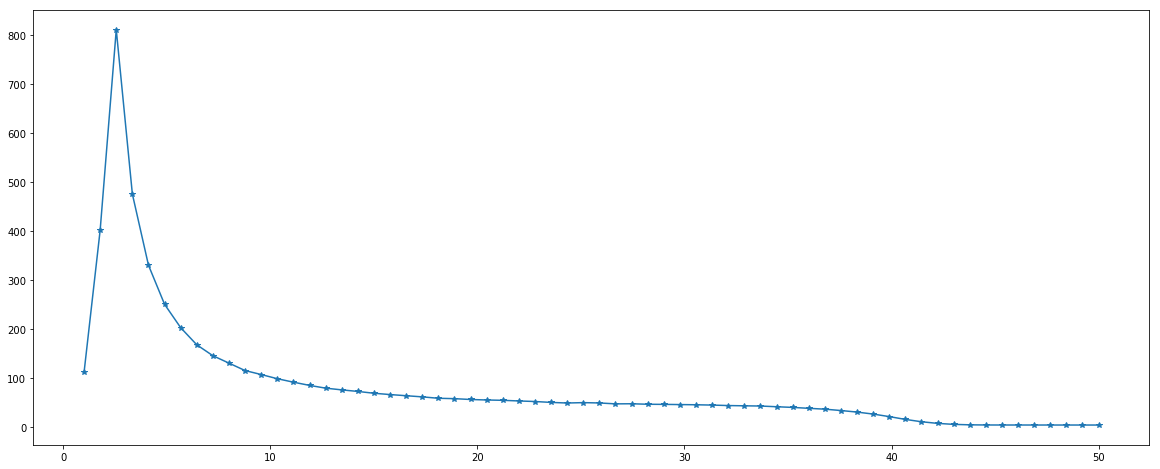

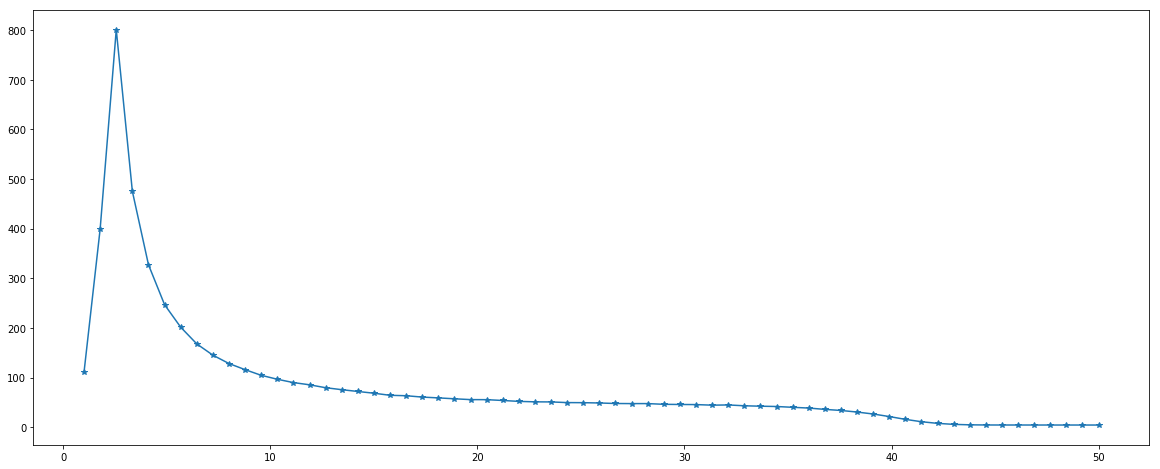

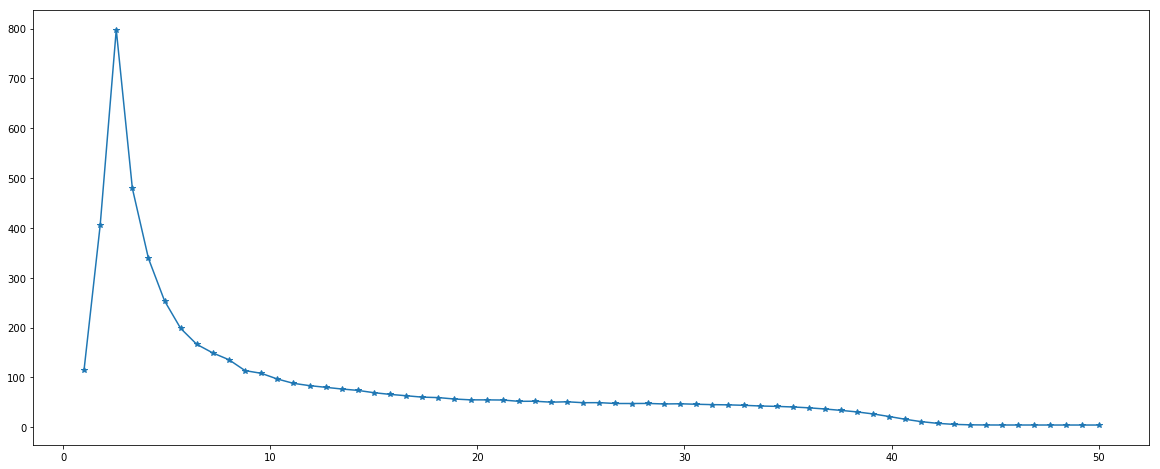

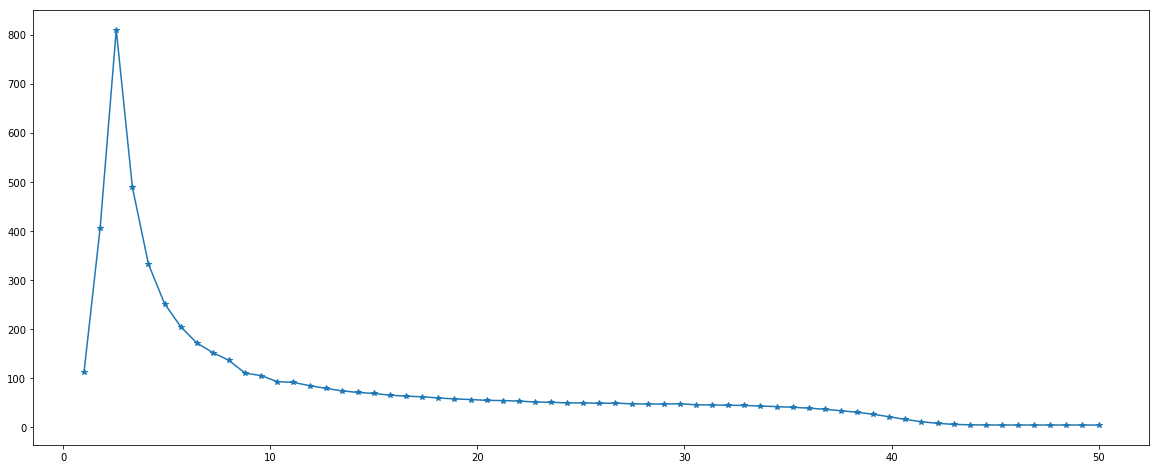

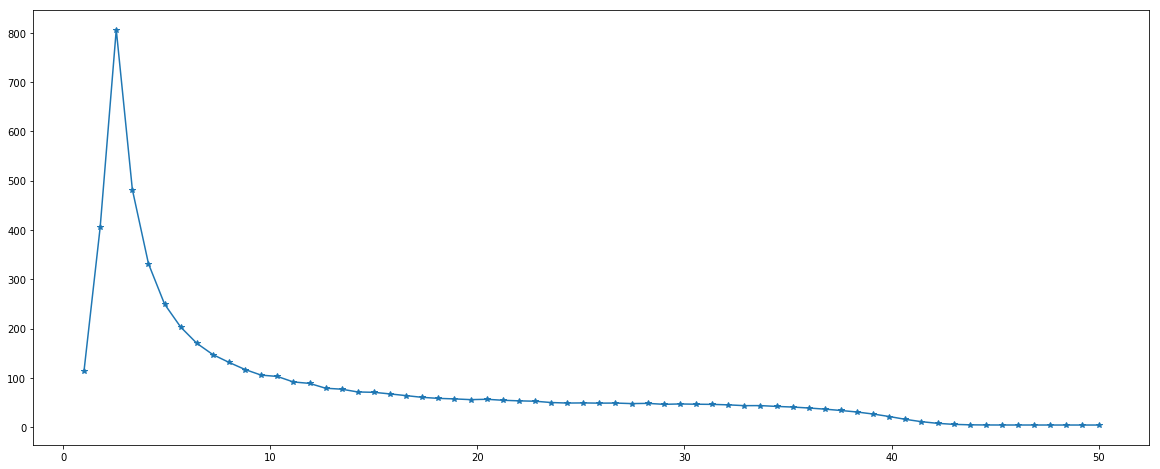

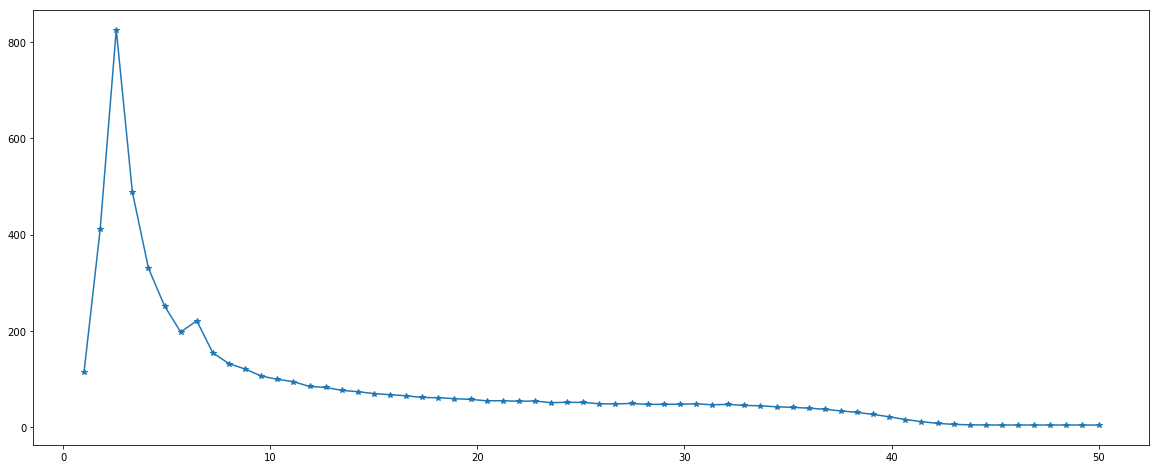

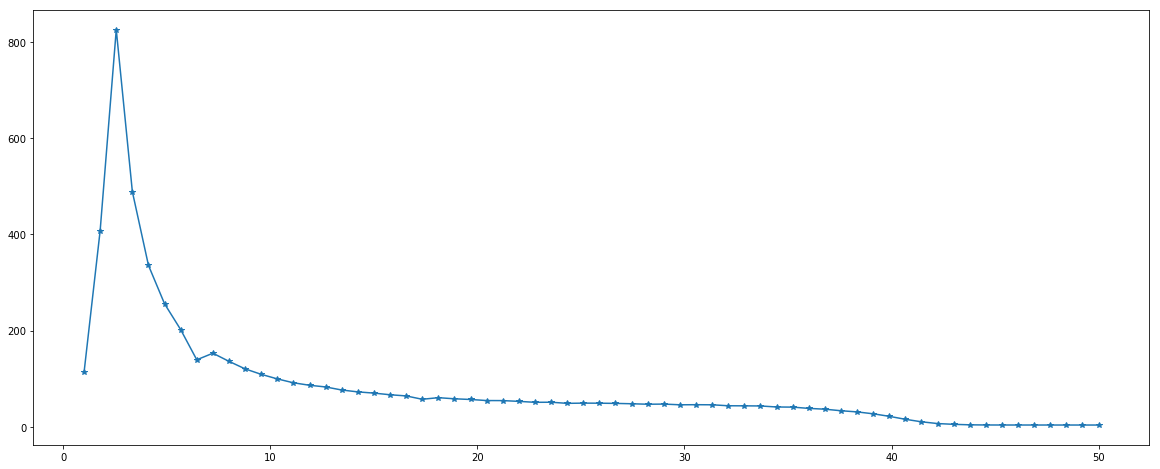

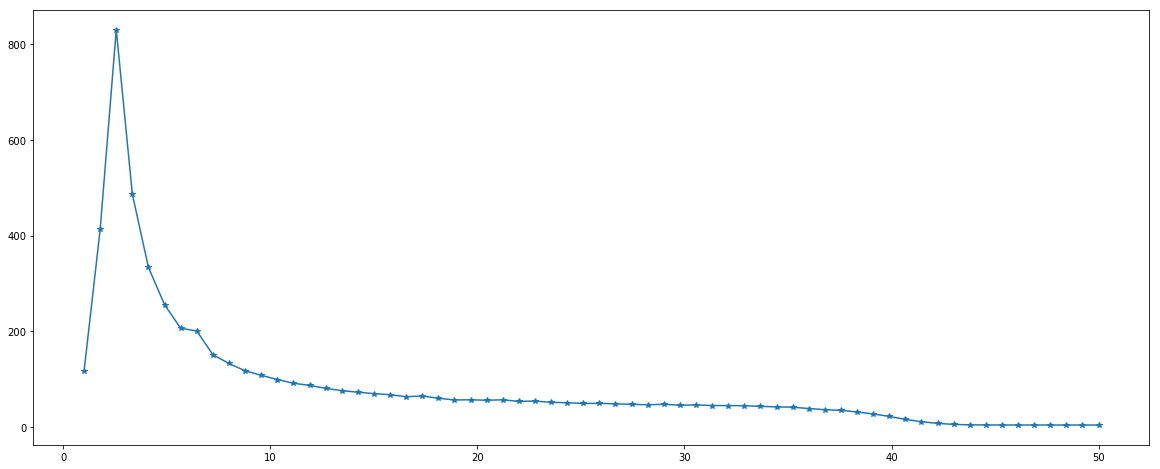

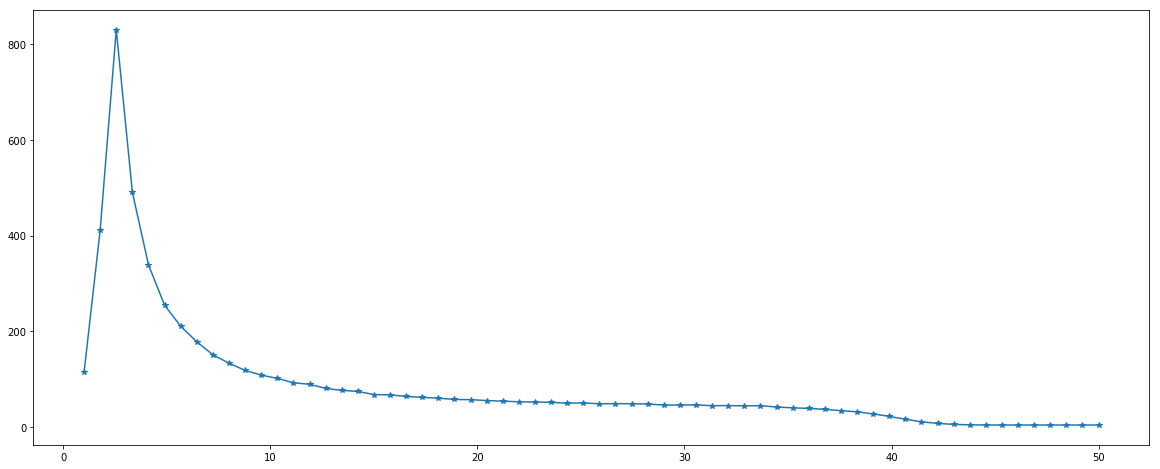

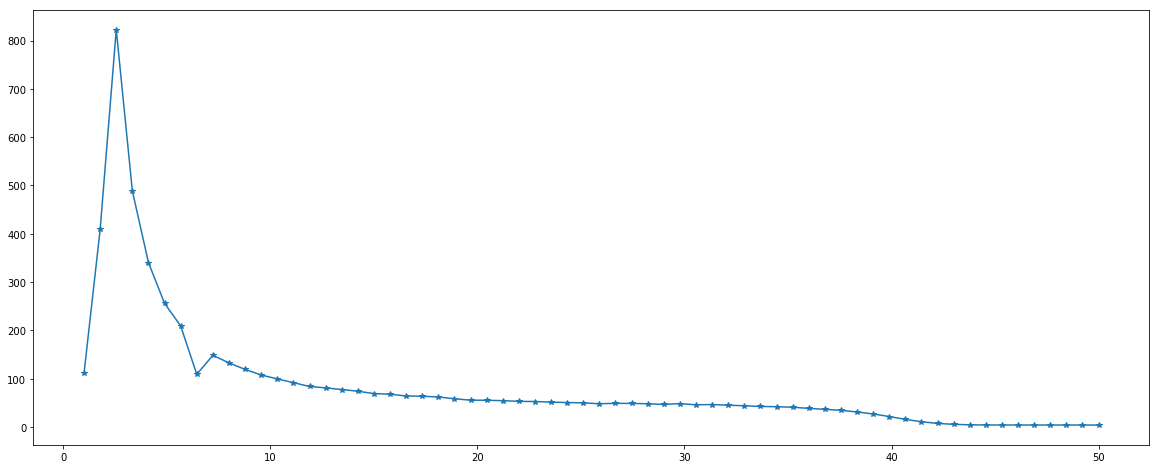

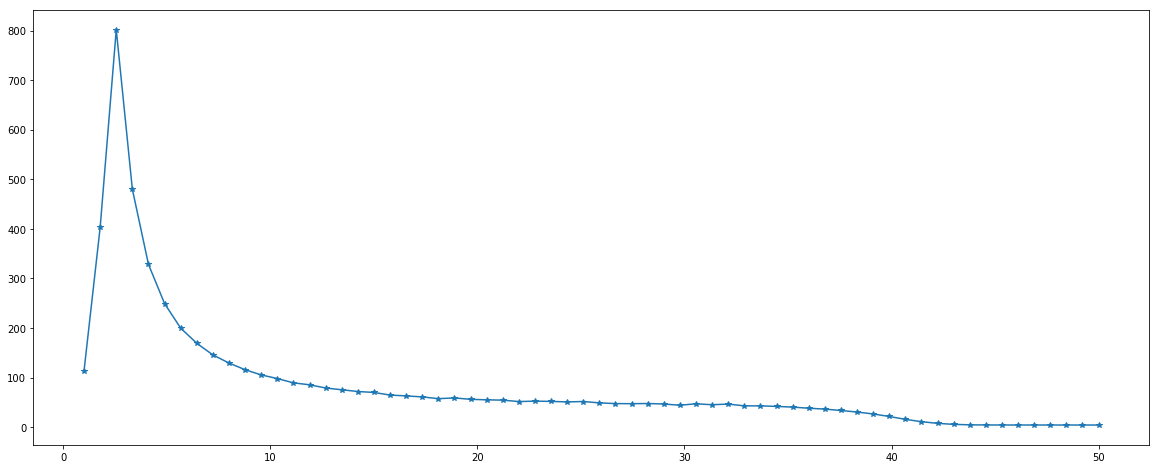

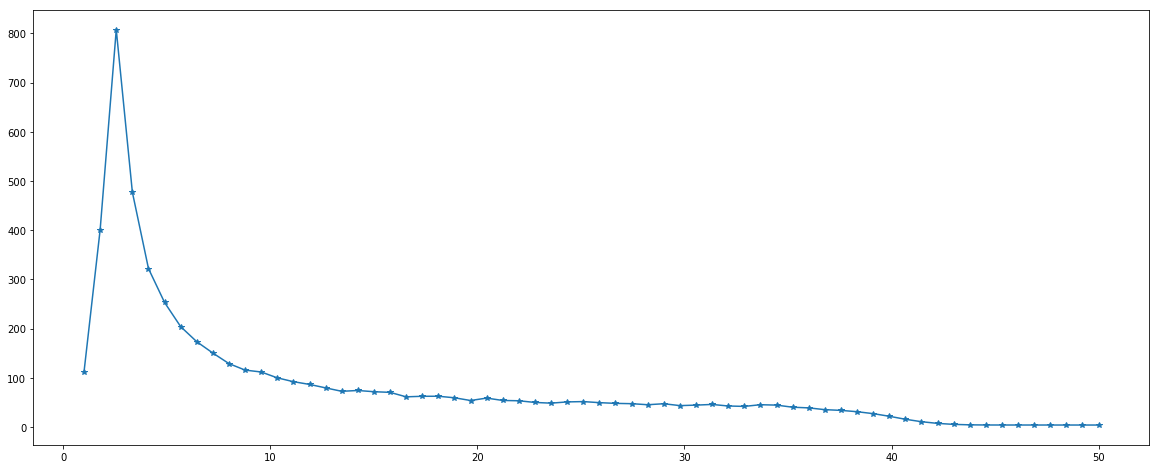

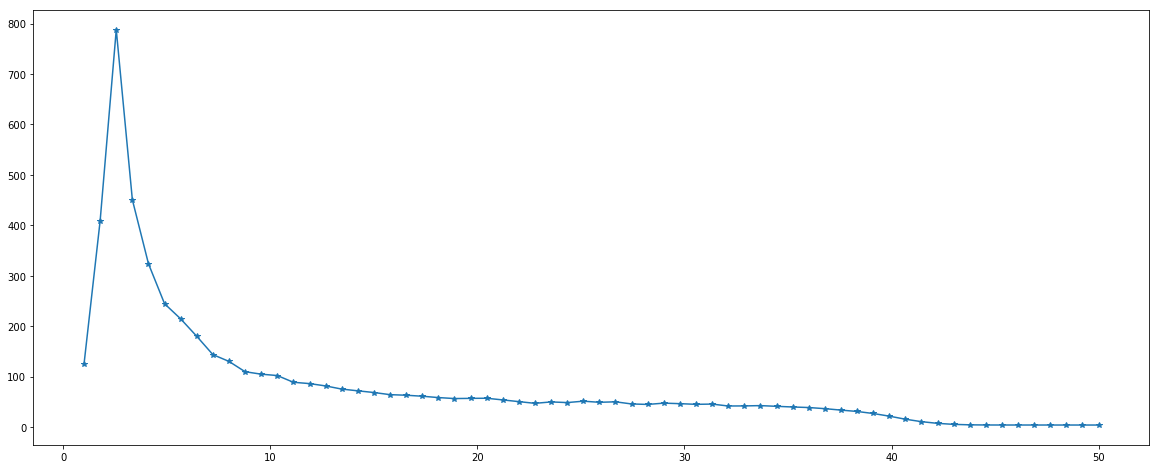

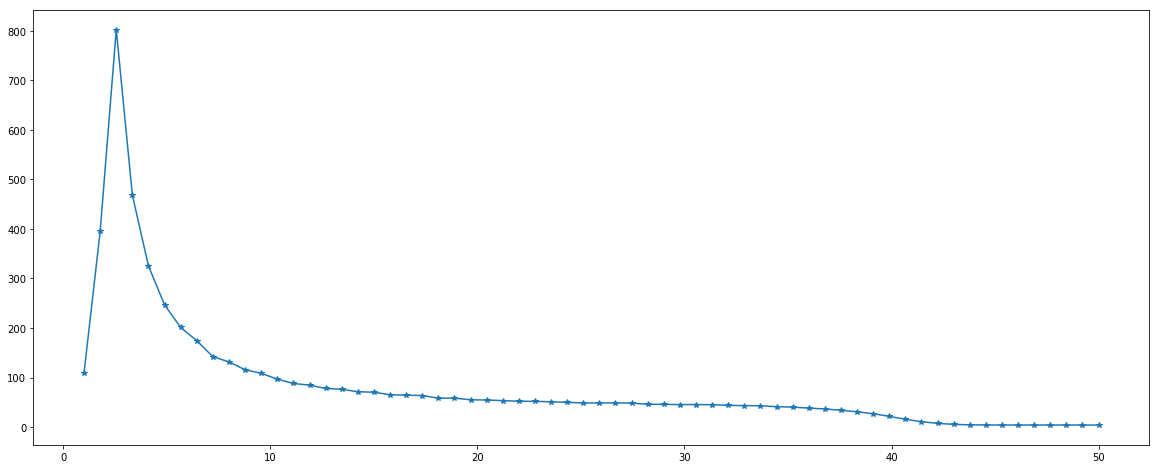

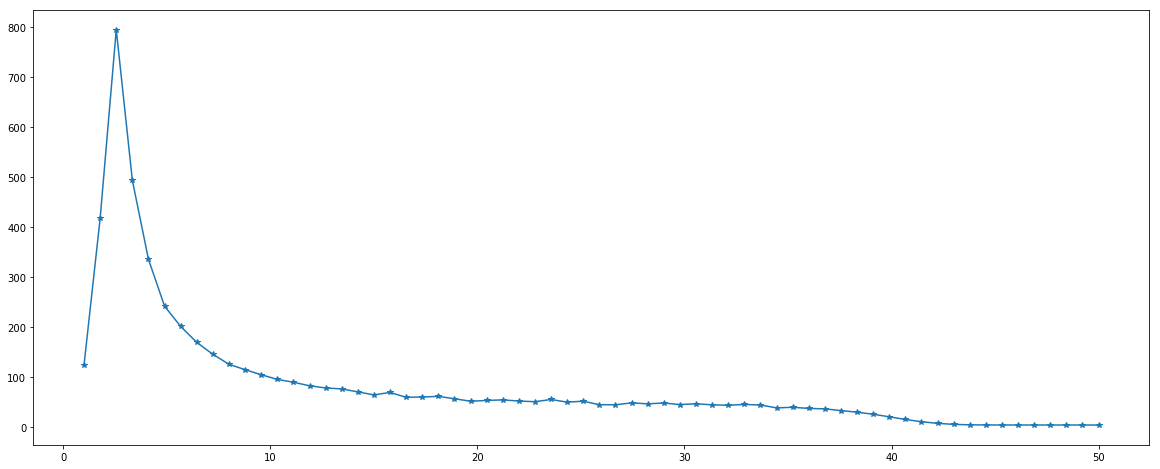

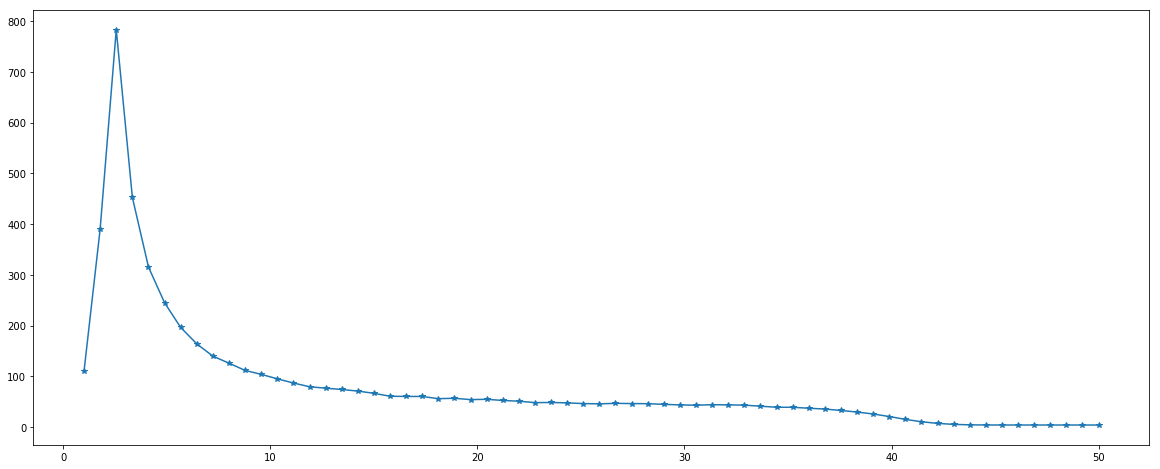

In [18]:
for i in range(TrainTouch.shape[0]):
    plt.figure(figsize=(20,8))
    X = np.linspace(1,50,64)
    plt.plot(X, TrainTouch[i,:],'*-')
    #plt.ylim(45,100)
    #plt.xlim(7,31)
    plt.show()

In [ ]:
# Filter, Each Data 128*5 second to as a period
# Return Data Shape : (DataNumbers, Channels, Features)
def BandPassSecond(SignalListData, LowerFreqCut, HigherFreq, fs, order=5, PlotFlag=False):
    channel_we_use = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]   # 0~39 共40, 14 channels we use
    SamplesPerSeconds = fs
    SignalData = np.zeros([len(SignalListData), len(channel_we_use), 64], dtype=np.float32)
    for i in range(len(SignalListData)):
        LabelNum = SignalListData[i].shape[0]
        FeaturesNum = SignalListData[i].shape[1]
        TimesToSplit = int(FeaturesNum/SamplesPerSeconds)
        print('Features Numbers : ', FeaturesNum)
        print('Times to Split Numbers :', TimesToSplit)
        ChCNT = 0
        for ch in range(LabelNum):
            if ch in channel_we_use:
                if ch in channel_we_use:
                    ChannelBuffer = np.zeros([TimesToSplit, SamplesPerSeconds], dtype=np.float32)
                    ChannelMean = np.zeros(SamplesPerSeconds, dtype=np.float32)
                    Times = 0
                    for t in range(TimesToSplit):
                        try:
                            ChannelBuffer[t][:] = BandPassFilter(SignalListData[i][ch][Times:Times+SamplesPerSeconds],
                                                                 LowerFreqCut, HigherFreqCut, fs, order=order)
                            Times += SamplesPerSeconds
                        except Exception as e:
                            pass
                    ChannelMean = np.mean(ChannelBuffer, axis=0)
                    SignalFreqX, ChannelMean = FFT(ChannelMean.reshape(-1), SampleFrequency, data_length=150)
                    SignalData[i][ChCNT][:] = ChannelMean
                    if PlotFlag:
                        PlotFreqencyFigure(SignalFreqX, SignalData[i][ChCNT][:], LowerFreqCut, HigherFreq, 0, 200)
                ChCNT += 1
    print()
    if CalculateZeros(SignalData) == 0:
        return SignalFreqX, SignalData
    else:
        print("Warning: Have Zero Values in the Numpy array !!!")
        return SignalFreqX, SignalData

In [ ]:
# Filter, Each Data 128*5 second to as a period
# Return Data Shape : (DataNumbers, Channels, Features)
def BandPassAllData(SignalListData, LowerFreqCut, HigherFreq, fs, order=5, PlotFlag=False):
    channel_we_use = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]   # 0~39 共40, 14 channels we use
    SamplesPerSeconds = fs
    SignalData = np.zeros([len(SignalListData), len(channel_we_use), 64], dtype=np.float32)
    for i in range(len(SignalListData)):
        LabelNum = SignalListData[i].shape[0]
        FeaturesNum = SignalListData[i].shape[1]
        #print('Features Numbers : ', FeaturesNum)
        ChCNT = 0
        for ch in range(LabelNum):
            if ch in channel_we_use:
                if ch in channel_we_use:
                    SignalBeforeFFT = SignalListData[i][ch][:]
                    if PlotFlag:
                        PlotDataOnTimeDomain(SignalBeforeFFT, fs, 4000, 4500)
                    SignalBeforeFFT = BandPassFilter(SignalBeforeFFT, LowerFreqCut, HigherFreq, fs, order=order)
                    if PlotFlag:
                        PlotDataOnTimeDomain(SignalBeforeFFT, fs, -100, 1000)
                    SignalFreqX, SignalData[i][ChCNT][:] = FFT(SignalBeforeFFT, fs, data_length=128)
                    if PlotFlag:
                        PlotFreqencyFigure(SignalFreqX, SignalData[i][ChCNT][:], 8, 31)
                    ChCNT += 1
    print()
    if CalculateZeros(SignalData) == 0:
        return SignalFreqX, SignalData
    else:
        print("Warning: Have Zero Values in the Numpy array !!!")
        return SignalFreqX, SignalData

In [ ]:


SignalFreqX, NormalSignalArray = BandPassAllData(normal_signal, LowerFreqCut, HigherFreqCut, SampleFrequency, order=BandPassOrder, PlotFlag=True)
SignalFreqX, ScareSignalArray = BandPassAllData(scare_signal, LowerFreqCut, HigherFreqCut, SampleFrequency, order=BandPassOrder, PlotFlag=False)
SignalFreqX, TouchSignalArray = BandPassAllData(touch_signal, LowerFreqCut, HigherFreqCut, SampleFrequency, order=BandPassOrder, PlotFlag=False)
SignalFreqX, LaughSignalArray = BandPassAllData(laugh_signal, LowerFreqCut, HigherFreqCut, SampleFrequency, order=BandPassOrder, PlotFlag=False)

if DEBUG:
    print('Normal Data shape:', NormalSignalArray.shape)
    print('Scare Data shape:', ScareSignalArray.shape)
    print('Touch Data shape:', TouchSignalArray.shape)
    print('Laugh Data shape:', LaughSignalArray.shape)

In [ ]:
# # Channel we choose and get the channel data
# def FFTChannelData(SignalArray, Channel, SAVE_FIG=False, name='FFTFreqFig'):
#     SignalNums = SignalArray.shape[0]
#     SignalChannelNums = SignalArray.shape[1]
#     SignalFeaturesNums = SignalArray.shape[2]
#     SignalChannelData = np.zeros([SignalNums, SignalFeaturesNums])
#     a = 0
#     b = 0
#     for i in range (SignalNums):
#         b = NormalSignalArray[i,Channel,:].reshape(-1)
#         SignalChannelData[i,Channel,:] = SignalArray[i,Channel,:]
#         if SAVE_FIG == True:
#             os.chdir(SaveFFTAllDataDirection)
#             fig = plt.gcf()   # Get Current Figure, 不加這行，save figire 時會存成白色
#             PlotFreqencyFigure(SignalFreqX,b,0,63,0,10)
#             FigName = name + '_%d' % (i+1) + '_ch%d' % Channel  + '.png'
#             fig.savefig(FigName)
# FFTChannelData(NormalSignalArray, 0, SAVE_FIG=False, name='Normal')

### Collect Channel one data to be the Training Data

In [ ]:
NormalNum = NormalSignalArray.shape[0]
ScareNum = ScareSignalArray.shape[0]
TouchNum = TouchSignalArray.shape[0]
LaughNum = LaughSignalArray.shape[0]
# Create the y label
NormalLabel = np.ones(NormalNum, dtype=np.float32) * 1
ScareLabel = np.ones(ScareNum, dtype=np.float32) * 2
TouchLabel = np.ones(TouchNum, dtype=np.float32) * 3
LaughLabel = np.ones(LaughNum, dtype=np.float32) * 4
for i in range(len(channel_we_use)):
    if i == 0:
        TrainingLabel = np.hstack((NormalLabel, ScareLabel, TouchLabel, LaughLabel[:]))
    else:
        y = np.hstack((NormalLabel, ScareLabel, TouchLabel, LaughLabel[:]))
        TrainingLabel = np.hstack((y, TrainingLabel))
print('Training Lable Shape : ', TrainingLabel.shape)

In [ ]:
# Get channel 1 data as Training data
# [8:31] is alpha and beta frequency domain
# channel = 12
# NormalChannel1 = NormalSignalArray[:,channel,8:31]
# ScareChannel1 = ScareSignalArray[:,channel,8:31]
# TouchChannel1 = TouchSignalArray[:,channel,8:31]
# LaughChannel1 = LaughSignalArray[:,channel,8:31]
# TrainingData = np.vstack((NormalChannel1, ScareChannel1, TouchChannel1, LaughChannel1))
# print('Training Data Shape : ', TrainingData.shape)

In [ ]:
'''
normal signal length :  16
scare signal length :  11
touch signal length :  9
laugh signal length :  16
'''
# grab Feature : Freq from 7 to 32  [6:32]
Features = 64

for channel in range(len(channel_we_use)):
    if channel == 0:
        TrainingData = np.vstack((NormalSignalArray[:,channel,:].reshape([16,Features]),
                                  ScareSignalArray[:,channel,:].reshape([11,Features]),
                                  TouchSignalArray[:,channel,:].reshape([9,Features]),
                                  LaughSignalArray[:,channel,:].reshape([16,Features])))
    else:
        X = np.vstack((NormalSignalArray[:,channel,:].reshape([16,Features]),
                                  ScareSignalArray[:,channel,:].reshape([11,Features]),
                                  TouchSignalArray[:,channel,:].reshape([9,Features]),
                                  LaughSignalArray[:,channel,:].reshape([16,Features])))
        TrainingData = np.vstack((TrainingData, X))
    print(TrainingData.shape)
print('Training Data Shape : ', TrainingData.shape)

In [ ]:
from sklearn.decomposition import PCA
mypca = PCA(n_components=30)
mypca = mypca.fit(TrainingData)
New_Data = mypca.transform(TrainingData)
print(mypca.explained_variance_ratio_*100)  
print(New_Data)


### Build Training Model

In [23]:
from Danny_ML_CLF import Danny_ML_CLF
clf = Danny_ML_CLF()
train_X, test_X, train_y, test_y = clf.Split_data(TrainingDataSplitTimeDomainX, TrainingDataSplitTimeDomainy, test_size=0.3, Standard=True)
clf.Fit_value(train_X, train_y)
clf.Train()
clf.Report(train_X, train_y, [1,2,3,4], show_cm=False)
clf.Report2txt('Train.txt')
print(clf.Score())
print()
clf.Report(test_X, test_y, [1,2,3,4], show_cm=False)
clf.Report2txt('Test.txt')
print(clf.Score())
print('Report Okay !\n\n')


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.5956920903954802
Tree Score :  0.5123587570621468
Bayes Score :  0.2676553672316384
KNN Score :  1.0
XGB Score :  0.7231638418079096
Stacking Score :  0.8997175141242938
Voting Score :  0.9597457627118644
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5194209039548022
None



C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.5247116968698518
Tree Score :  0.4546952224052718
Bayes Score :  0.2471169686985173
KNN Score :  0.6449752883031301
XGB Score :  0.5222405271828665
Stacking Score :  0.6021416803953872
Voting Score :  0.6268533772652389
Bagging Score :  0.5741350906095551
RF Score :  0.5971993410214168
Adaboost Score :  0.47775947281713343
None
Report Okay !




In [22]:
clf.RF_prediction(test_X)

array([4., 4., 4., ..., 1., 1., 4.])

In [ ]:
for i in range(len(channel_we_use)):
    Nor = NormalSignalArray[:,i,6:32].reshape(NormalSignalArray.shape[0], Features)
    Sca = ScareSignalArray[:,i,6:32].reshape(ScareSignalArray.shape[0], Features)
    Tou = TouchSignalArray[:,i,6:32].reshape(TouchSignalArray.shape[0], Features)
    Lau = LaughSignalArray[:,i,6:32].reshape(LaughSignalArray.shape[0], Features)
    y1 = np.ones([NormalSignalArray.shape[0]], dtype=np.float32) * 1
    y2 = np.ones([ScareSignalArray.shape[0]], dtype=np.float32) * 2
    y3 = np.ones([TouchSignalArray.shape[0]], dtype=np.float32) * 3
    y4 = np.ones([LaughSignalArray.shape[0]], dtype=np.float32) * 4
    X = np.vstack((Nor, Sca, Tou, Lau))
    y = np.hstack((y1,y2,y3,y4))

    clf = Danny_ML_CLF()
    train_X, test_X, train_y, test_y = clf.Split_data(X, y, test_size=0.3, Standard=True)
    print(train_X.shape)
    print(train_y.shape)   
    clf.Fit_value(train_X, train_y)
    clf.Train()
    clf.Report(test_X, test_y, [1,2,3,4], show_cm=False)
    clf.Report2txt(ChannelDict[channel_we_use[i]] + '.txt')
    print('Report Okay !\n\n')
    clf.Score()

In [ ]:
print(X.shape)
print(y.shape)